In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
from single_data_processing import SingleAssetTI
import itertools
import yfinance as yf
from pso import PortfolioPSO
from model_comparator import ModelComparator
from island_ga import IslandGGA
from single_data_processing import SingleAssetTI

import datetime

In [ ]:
#GROUPON  single stock downtrend
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period =2022
pSize = 200
num_iter = 50
num_runs = 10
K = 19
m_iter = 5
num_islands = 5
tickers = ['GRPN']
diversified = False



[*********************100%***********************]  1 of 1 completed


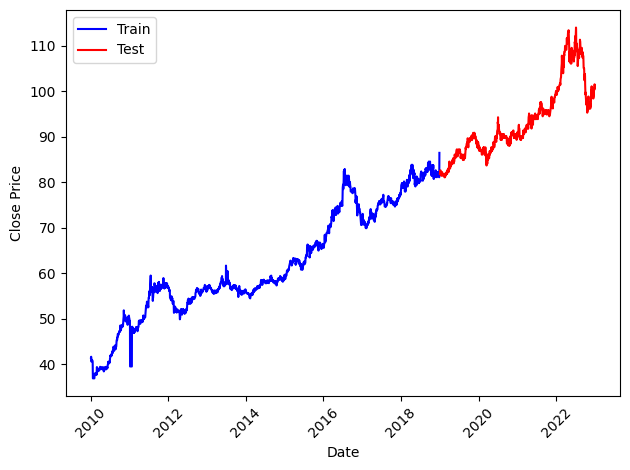

Running model:  ring
Running ring
Generation 1: Best fitness = 1.9904521051515707  Average Fitness = 1.9734747235159962
Generation 2: Best fitness = 1.9904521051515707  Average Fitness = 1.9876099582381397
Generation 3: Best fitness = 1.9904521051515707  Average Fitness = 1.99045210515157
Generation 4: Best fitness = 1.9904521051515707  Average Fitness = 1.9858348211763501
Generation 5: Best fitness = 1.9904521051515707  Average Fitness = 1.989031031694855
Island 0 Migration - Left 4 - Right 1
Island 1 Migration - Left 0 - Right 2
Island 2 Migration - Left 1 - Right 3
Island 3 Migration - Left 2 - Right 4
Island 4 Migration - Left 3 - Right 0
Generation 6: Best fitness = 1.9904521051515707  Average Fitness = 1.99045210515157
Generation 7: Best fitness = 1.9904521051515707  Average Fitness = 1.99045210515157
Generation 8: Best fitness = 1.9904521051515707  Average Fitness = 1.99045210515157
Generation 9: Best fitness = 1.9904521051515707  Average Fitness = 1.99045210515157
Generation 10

[*********************100%***********************]  1 of 1 completed


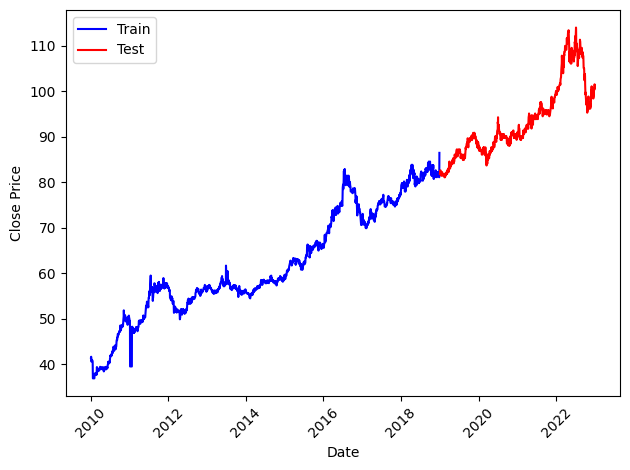

Running model:  ring
Running ring
Generation 1: Best fitness = 1.9904521051515707  Average Fitness = 1.989031031694855
Generation 2: Best fitness = 1.9904521051515707  Average Fitness = 1.9820766641012963
Generation 3: Best fitness = 1.9904521051515707  Average Fitness = 1.9890310316948547
Generation 4: Best fitness = 1.9904521051515707  Average Fitness = 1.989031031694855
Generation 5: Best fitness = 1.9904521051515707  Average Fitness = 1.99045210515157
Island 0 Migration - Left 4 - Right 1
Island 1 Migration - Left 0 - Right 2
Island 2 Migration - Left 1 - Right 3
Island 3 Migration - Left 2 - Right 4
Island 4 Migration - Left 3 - Right 0
Generation 6: Best fitness = 1.9904521051515707  Average Fitness = 1.984843311169718
Generation 7: Best fitness = 1.9904521051515707  Average Fitness = 1.9890310316948547
Generation 8: Best fitness = 1.9904521051515707  Average Fitness = 1.989031031694855
Generation 9: Best fitness = 1.9904521051515707  Average Fitness = 1.99045210515157
Generation

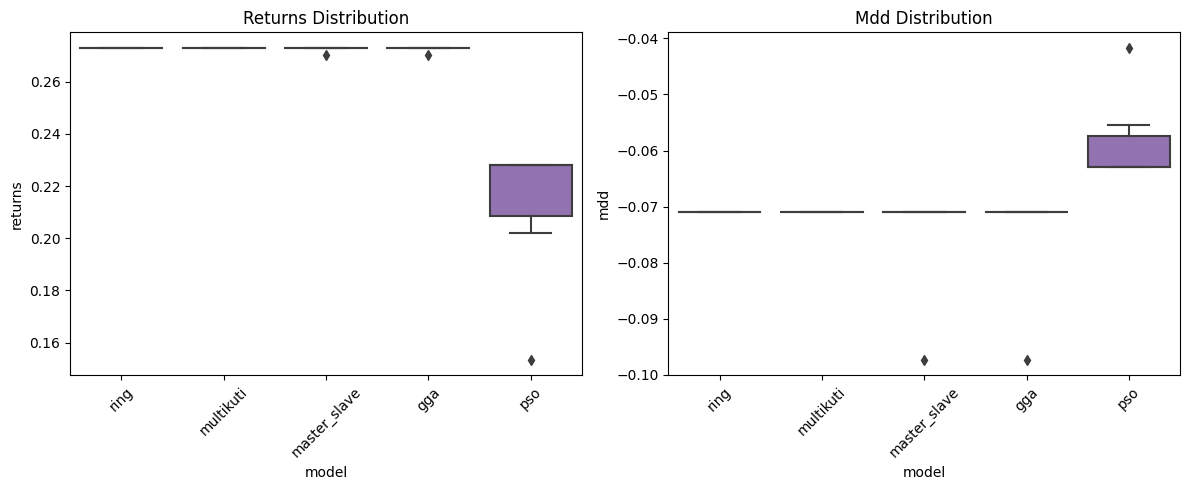

In [ ]:
# Usage
import traceback

try:
    # Code that raises the error
    np.random.seed(42)
    comparator = ModelComparator(stock_tickers=tickers,period=period,start_date=start_date, end_date=end_date, pSize=pSize, num_iter=num_iter, num_runs=num_runs, K=K,m_iter=m_iter, num_islands=num_islands,diversified=diversified)
    results_df = comparator.run_comparison()
    comparator.plot_results(results_df, comparator.optimization_approaches)
    results_df.to_csv('results/downtrend.csv')
        
except Exception as e:   
    print("An error occurred:")
    traceback.print_exc()


In [4]:
results_df = pd.read_csv('results/sideways.csv')
pd.set_option('display.max_rows', None)
results_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,0.7302,-0.2630
master_slave,0.7028,-0.2389
multikuti,0.7138,-0.2410
pso,0.3127,-0.1305
ring,0.7149,-0.2389


In [5]:
training_df = results_df[results_df['phase'] == 'train']
training_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,0.7449,-0.1609
master_slave,0.7449,-0.1609
multikuti,0.7449,-0.1609
pso,0.5592,-0.1117
ring,0.7449,-0.1609


In [6]:
validation_df = results_df[results_df['phase'] == 'validation']
validation_df.groupby([ 'model'])[[ 'returns', 'mdd']].mean().round(4)

,returns,mdd
model,,
gga,0.7155,-0.3651
master_slave,0.6607,-0.3170
multikuti,0.6827,-0.3211
pso,0.0663,-0.1492
ring,0.6848,-0.3169
